In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [12]:
# label red as 0 and white as 1
red['class'] = 0
white['class'] = 1

In [13]:
# Concatenate and check null value records
wine = pd.concat([red, white])
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [14]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [15]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
print(dt.feature_importances_)

0.9996151625938041
0.9830769230769231
[0.00538684 0.04948568 0.00319557 0.00225343 0.20631337 0.00183762
 0.68904542 0.01236998 0.01416634 0.01365591 0.00147311 0.00081672]


In [17]:
# Hyper parameter tuning
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(test_input, test_target))

{'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
0.9863389353668468
0.98


In [18]:
# Random search
params = {'min_impurity_decrease': uniform(0.00001, 0.001),
          'max_depth': randint(5, 20),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
}
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=1000, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(test_input, test_target))

{'max_depth': 11, 'min_impurity_decrease': 0.0002886464642366115, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9853770267268824
0.9792307692307692


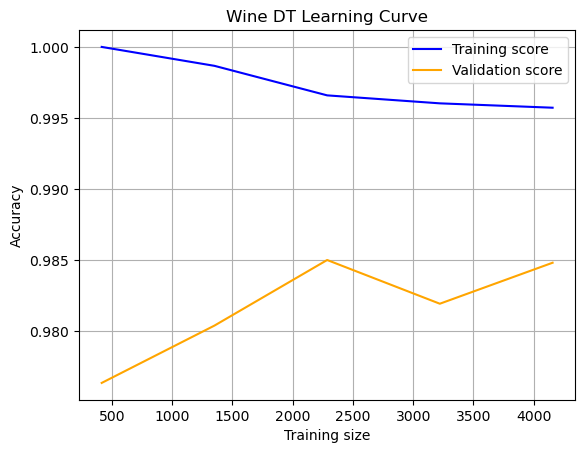

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(max_depth=7),
    train_input,
    train_target,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.grid()
plt.title('Wine DT Learning Curve', loc='center')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, train_scores_mean, color='blue', label="Training score")
plt.plot(train_sizes, test_scores_mean, color='orange', label="Validation score")
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\wine_dt_lc.png', format='png')
plt.show()

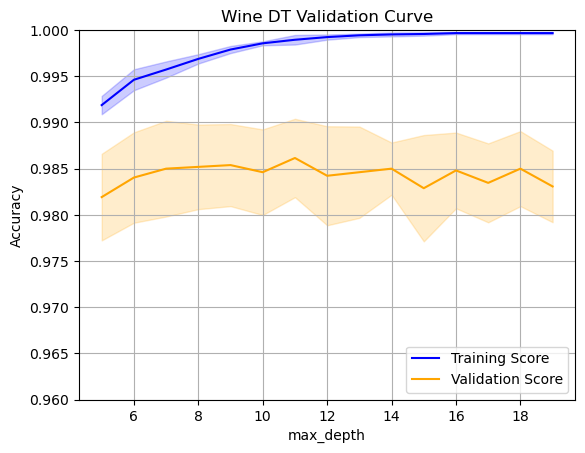

In [26]:
param_name = "max_depth"
param_range = range(5, 20, 1)

train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(), train_input, train_target, param_name=param_name,
    param_range=param_range, cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', label='Training Score')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', label='Validation Score')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.grid()
plt.title('Wine DT Validation Curve', loc='center')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1.00])
plt.savefig('graph\\wine_dt_vc.png', format='png')
plt.show()